In [30]:
import pandas as pd
import numpy as np
import scipy
from sklearn.preprocessing import StandardScaler

%load_ext autoreload
%autoreload 2
import main

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [97]:
mat = scipy.io.loadmat('ex2data3.mat')

# TODO: rotate
raw_x = pd.DataFrame(mat['X'])

scaler = StandardScaler()
x = scaler.fit_transform(raw_x)

x = pd.DataFrame(x)
x.insert(0, 'free', 1)

y = pd.DataFrame(mat['y']) \
    .applymap(lambda x: 0 if x == 10 else x) \
    .iloc[:, 0]

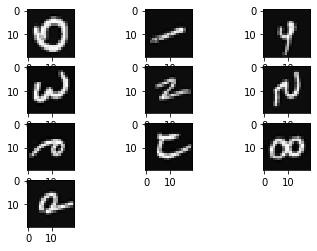

In [32]:
%matplotlib inline
import matplotlib.pyplot as plt

fig = plt.figure()
for i in range(10):
    ax = fig.add_subplot(4, 3, i + 1)
    index = y[y == i].sample(1).index[0]
    number = raw_x.iloc[index].values.reshape(20, 20)
    ax.imshow(number, cmap='gray')

plt.show()

In [ ]:
alpha = 0.003
tolerance = 0.0006
reg_param = 0.01
theta_0 = pd.Series(0, index=range(len(x.columns)))

thetas = []
for i in range(10):
    new_y = y.apply(lambda v: 1 if v == i else 0)
    _, theta = main.run_descent(alpha, tolerance, theta_0, x, new_y, reg_param)
    thetas.append(theta)

Prediction:  4


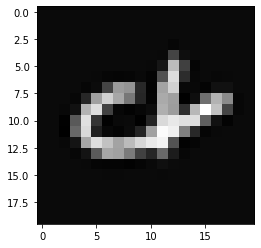

In [125]:
import random

%matplotlib inline
import matplotlib.pyplot as plt


def hypothesis(sample):
    scaled = scaler.transform(sample)
    padded = np.insert(scaled, 0, 1)
    predictions = [main.logistic_hypothesis(padded, theta) for theta in thetas]
    index, _ = max(enumerate(predictions), key=lambda p: p[1])
    return index

datum = raw_x.iloc[[random.randint(0, 4999)]]
print('Prediction: ', hypothesis(datum))

plt.imshow(datum.values.reshape(20, 20), cmap='gray')
plt.show()

In [127]:
correct = 0
for index, row in raw_x.iterrows():
    prediction = hypothesis([row])
    actual = y[index]
    if prediction == actual:
        correct += 1

print('Total accuracy: ', correct / len(raw_x))

Total accuracy:  0.853
